### 신용카드 부정 거래 탐지 시스템 개발

문제

신용카드 부정 거래를 탐지하는 모델 훈련

- 데이터는 Kaggle에서 제공하는 **Credit Card Fraud Detection** 데이터셋을 사용
- 주어진 신용카드 거래 데이터를 기반으로 부정 거래를 식별하는 모델을 학습시키고, 이 모델을 통해 이상치(부정 거래)를 탐지
- 이 데이터는 각 거래의 다양한 특성과 `Class`라는 열로 부정 거래 여부를 표시
- `Class` 값이 **1**이면 부정 거래, **0**이면 정상 거래를 의미
- 이 문제의 목표는 주어진 데이터를 기반으로 부정 거래를 탐지하는 **Isolation Forest** 모델을 활용하여
- 이상치(부정 거래)를 정확하게 탐지하는 것

총 데이터 수 :  284807
이상치 개수 :  492
탐지된 이상치 수: 1424

=== 이상치 범위 ===
시간(Time): 103.0 ~ 172786.0
금액(Amount): 0.0 ~ 25691.16


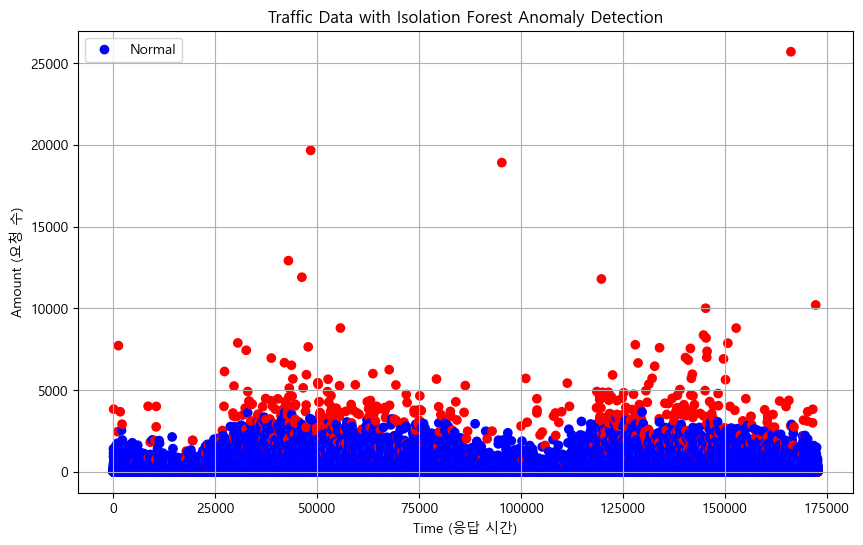

전체 데이터와 이상 탐지 결과:
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V23       V24  \
0       0.462388  0.239599  0.098698  0.36

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 모델 불러온 후 이상치 개수 확인
df = pd.read_csv('creditcard.csv')

print('총 데이터 수 : ', df.shape[0])
print('이상치 개수 : ', df[df['Class'] == 1].shape[0])

# 'Class'를 제외한 값들 정규화 진행
scaler = StandardScaler()
scaler_df = df.drop(columns='Class')
scaler_df = scaler.fit_transform(scaler_df)

#모델 생성 및 스케일링 데이터로 훈련진행
model = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)

df['Anomaly Score'] = model.fit_predict(scaler_df)
df['Anomaly'] = df['Anomaly Score'].apply(lambda x:'Normal' if x == 1 else 'Anomaly')

# 이상치 데이터 탐색
anomalous_data = df[df['Anomaly Score'] == -1]
print(f"탐지된 이상치 수: {anomalous_data.shape[0]}")

# 이상치 범위 출력
print("\n=== 이상치 범위 ===")
print(f"시간(Time): {anomalous_data['Time'].min()} ~ {anomalous_data['Time'].max()}")
print(f"금액(Amount): {anomalous_data['Amount'].min()} ~ {anomalous_data['Amount'].max()}")

# 4. 시각화
# 정상과 비정상을 다른 색으로 표시하여 트래픽 데이터 시각화
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
plt.scatter(
df["Time"], df["Amount"],
c=df['Anomaly'].map({"Normal": "blue", "Anomaly": 
"red"}), # 색상 매핑
  label='Traffic'
 )
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("Time (응답 시간)")
plt.ylabel("Amount (요청 수)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()
 # 5. 결과 출력
# 전체 데이터프레임을 출력하여 정상/비정상 데이터 확인
print("전체 데이터와 이상 탐지 결과:")
print(df)


In [82]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [83]:
df = pd.read_csv('creditcard.csv')

print('총 데이터 수 : ', df.shape[0])
print('이상치 개수 : ', df[df['Class'] == 1].shape[0])
df

총 데이터 수 :  284807
이상치 개수 :  492


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [87]:
X = df.drop(columns=['Class', 'Time', 'Amount'])
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [88]:
from sklearn.decomposition import PCA
# PCA 적용
pca = PCA(n_components=28)
pca.fit(X)

# 기여도 확인
explained_variance = pca.explained_variance_ratio_
importance_df = pd.DataFrame({'Feature': X.columns, 'Explained Variance': explained_variance})
importance_df = importance_df.sort_values(by='Explained Variance', ascending=False)

print("=== PCA로 계산된 특성 기여도 ===")
print(importance_df)

# 기여도가 낮은 특성 확인
low_importance_features = importance_df[importance_df['Explained Variance'] < 0.01]['Feature']
print(f"기여도가 낮은 특성: {low_importance_features.tolist()}")


=== PCA로 계산된 특성 기여도 ===
   Feature  Explained Variance
0       V1            0.124838
1       V2            0.088729
2       V3            0.074809
3       V4            0.065231
4       V5            0.061990
5       V6            0.057756
6       V7            0.049799
7       V8            0.046417
8       V9            0.039275
9      V10            0.038579
10     V11            0.033901
11     V12            0.032488
12     V13            0.032233
13     V14            0.029901
14     V15            0.027262
15     V16            0.024984
16     V17            0.023473
17     V18            0.022860
18     V19            0.021563
19     V20            0.019339
20     V21            0.017556
21     V22            0.017137
22     V23            0.012689
23     V24            0.011936
24     V25            0.008842
25     V26            0.007567
26     V27            0.005301
27     V28            0.003545
기여도가 낮은 특성: ['V25', 'V26', 'V27', 'V28']


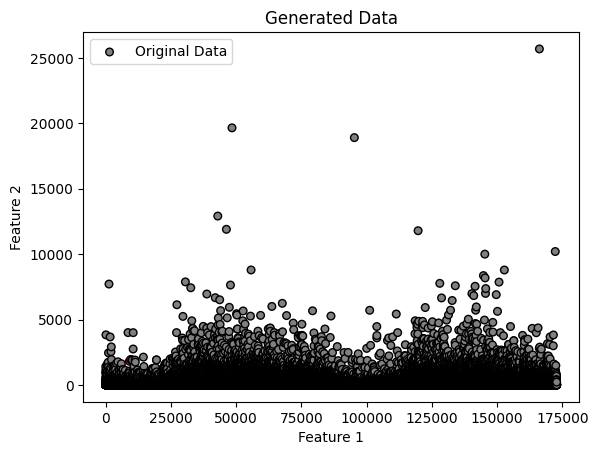

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["gray", "red"])  # Class 0은 파란색, Class 1은 빨간색
colors = df['Class'].map({0: 0, 1: 1})  # 숫자로 매핑

plt.scatter(
    df['Time'],
    df['Amount'],
    s=30,
    c=colors,
    cmap=cmap,
    label="Original Data",
    edgecolor="k"
)
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [5]:
scaler = StandardScaler()
scaler_df = df.drop(columns='Class')
scaler_df = scaler.fit_transform(scaler_df)
scaler_df

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

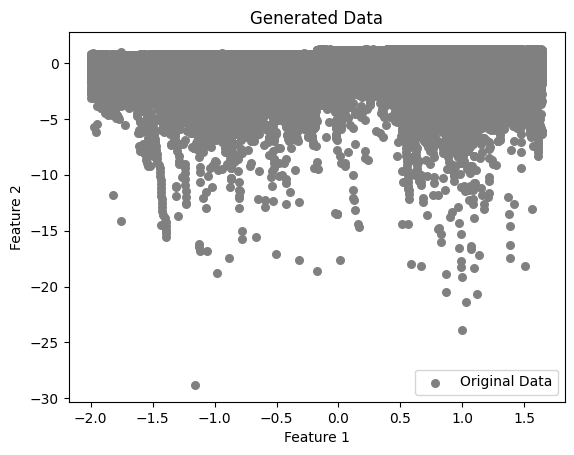

In [6]:
import matplotlib.pyplot as plt
# 데이터 시각화
plt.scatter(scaler_df[:, 0], scaler_df[:, 1], s=30, color='gray', label="Original Data")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\user\AppData\

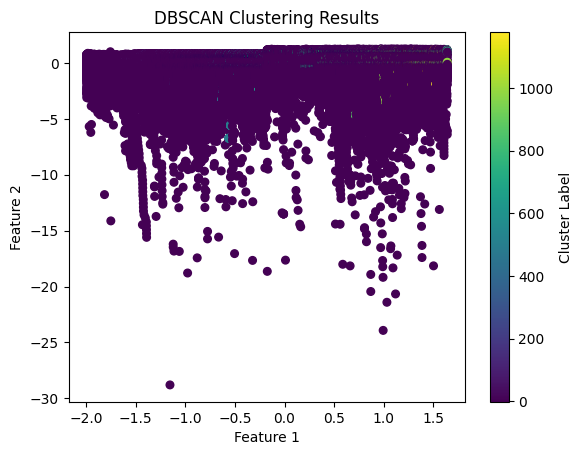

In [16]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.2, min_samples=5)
cluster_labels = dbscan.fit_predict(scaler_df)

# 3. 클러스터링 결과 분석
# 클러스터링 결과 시각화
plt.scatter(scaler_df[:, 0], scaler_df[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [34]:
df['Cluster'] = cluster_labels
df['Anomaly'] = df['Cluster'].apply(lambda x: 
"Anomaly" if x ==-1 else "Normal")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster,Anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1,Anomaly
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1,Anomaly
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1,Anomaly
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1,Anomaly
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-1,Anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-1,Anomaly
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-1,Anomaly
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-1,Anomaly
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-1,Anomaly


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = df['Anomaly'].map({'Normal': 0, 'Anomaly': 1})
# 4. 모델 평가
print("\n=== 모델 평가 ===")
print("혼동 행렬:")
print(confusion_matrix(df['Class'], y_pred))
print("\n분류 보고서:")
print(classification_report(df['Class'], y_pred))


=== 모델 평가 ===
혼동 행렬:
[[ 22748 261567]
 [     6    486]]

분류 보고서:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15    284315
           1       0.00      0.99      0.00       492

    accuracy                           0.08    284807
   macro avg       0.50      0.53      0.08    284807
weighted avg       1.00      0.08      0.15    284807



In [173]:
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

In [174]:
df['Anomaly Score'] = model.fit_predict(scaler_df)
df['Anomaly'] = df['Anomaly Score'].apply(lambda x:'Normal' if x == 1 else 'Anomaly')

In [175]:
anomalous_data = df[df['Anomaly'] == 'Anomaly']
print('총 데이터 개수 : ', df.shape[0])
print('총 이상치 수 : ', anomalous_data.shape[0])
print('이상치 개수 : ', anomalous_data[anomalous_data['Class'] == 1].shape[0])


총 데이터 개수 :  284807
총 이상치 수 :  28481
이상치 개수 :  434


In [176]:
df[(df['Class'] == 0) & (df['Anomaly Score'] == -1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly Score,Anomaly
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1,Anomaly
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,-1,Anomaly
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0,-1,Anomaly
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0,-1,Anomaly
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0,-1,Anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0,-1,Anomaly
284786,172768.0,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0,-1,Anomaly
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0,-1,Anomaly
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-1,Anomaly


In [177]:
# 이상 범위를 출력
min_request_count = anomalous_data["Time"].min()
max_request_count = anomalous_data["Time"].max()
min_response_time = anomalous_data["Amount"].min()
max_response_time = anomalous_data["Amount"].max()
print(f"비정상 데이터 범위:")
print(f"-요청 수 (Request Count): {min_request_count:.2f} ~ {max_request_count:.2f}")
print(f"-응답 시간 (Response Time): {min_response_time:.2f} ~ {max_response_time:.2f}")

비정상 데이터 범위:
-요청 수 (Request Count): 1.00 ~ 172788.00
-응답 시간 (Response Time): 0.00 ~ 25691.16


In [178]:
df[(df['Class'] == 1) & (df['Anomaly Score'] == -1)].shape

(434, 33)

In [180]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Anomaly Score,Anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,Normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,Normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1,Anomaly
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-1,Anomaly
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,Normal
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,Normal
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-1,Anomaly


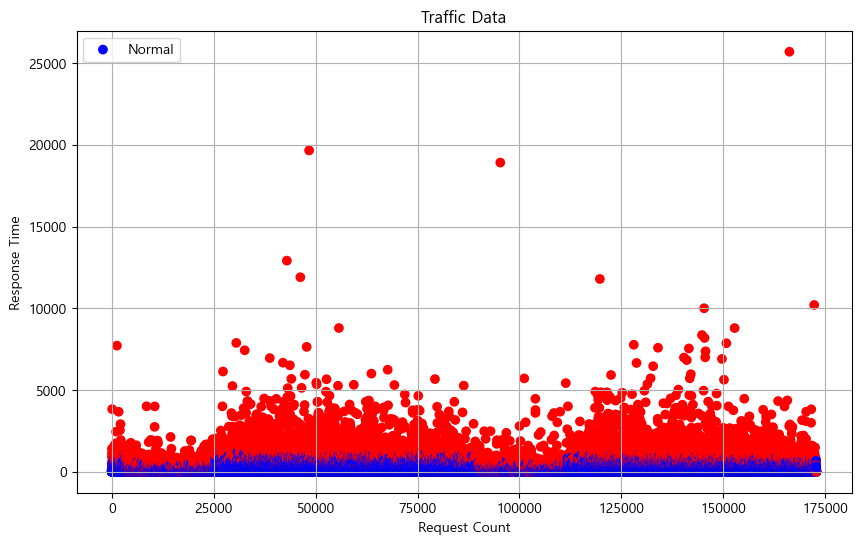

In [182]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Time'], df['Amount'],
    c=df['Anomaly'].map({'Normal' : 'blue', 'Anomaly' : 'red'}),
    label='Traffic'
)
plt.title('Traffic Data')
plt.xlabel('Request Count')
plt.ylabel('Response Time')
plt.legend(['Normal', 'Anomaly'])
plt.grid()
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0          Normal
1          Normal
2         Anomaly
3          Normal
4          Normal
           ...   
284802    Anomaly
284803     Normal
284804     Normal
284805    Anomaly
284806     Normal
Name: Anomaly, Length: 284807, dtype: object

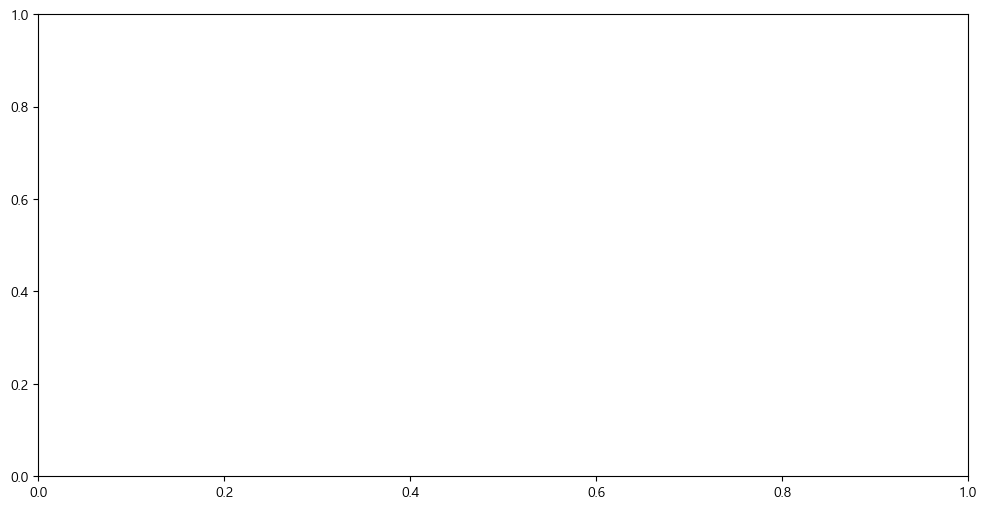

In [167]:
# 6. 시각화
plt.figure(figsize=(12, 6))
plt.scatter(
    df['Time'], df['Amount'],
    c=df['Anomaly'], cmap='coolwarm', alpha=0.6
)
plt.title("신용카드 거래 이상 탐지 결과 (Isolation Forest)")
plt.xlabel("Time (시간)")
plt.ylabel("Amount (금액)")
plt.colorbar(label="Anomaly (0: 정상, 1: 이상치)")
plt.grid()
plt.show()

총 데이터 수: 284807
부정 거래 수 (Class=1): 492

=== 모델 평가 ===
혼동 행렬:
[[283887    428]
 [   350    142]]

분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.25      0.29      0.27       492

    accuracy                           1.00    284807
   macro avg       0.62      0.64      0.63    284807
weighted avg       1.00      1.00      1.00    284807

탐지된 이상치 수: 570

=== 이상치 범위 ===
시간(Time): 1264.0 ~ 172778.0
금액(Amount): 0.0 ~ 25691.16


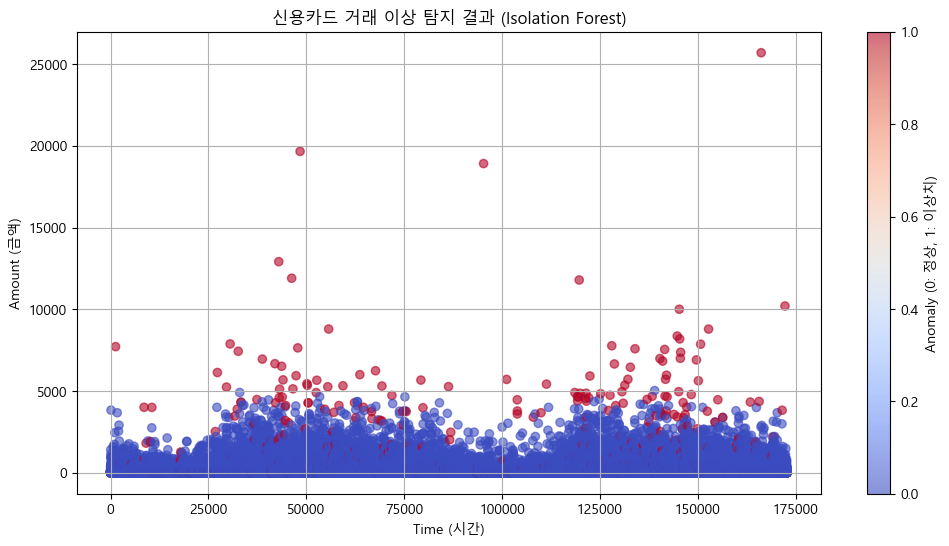

In [131]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('creditcard.csv')
print(f"총 데이터 수: {df.shape[0]}")
print(f"부정 거래 수 (Class=1): {df[df['Class'] == 1].shape[0]}")

# 2. 데이터 전처리
# 'Time'과 'Amount'를 포함한 모든 데이터를 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['Class'], axis=1))

# 3. Isolation Forest 모델 학습
model = IsolationForest(n_estimators=1000, contamination=0.002, random_state=42)
df['Anomaly Score'] = model.fit_predict(df_scaled)
df['Anomaly'] = df['Anomaly Score'].apply(lambda x: 1 if x == -1 else 0)

# 4. 모델 평가
print("\n=== 모델 평가 ===")
print("혼동 행렬:")
print(confusion_matrix(df['Class'], df['Anomaly']))
print("\n분류 보고서:")
print(classification_report(df['Class'], df['Anomaly']))

# 5. 이상치 데이터 탐색
anomalous_data = df[df['Anomaly'] == 1]
print(f"탐지된 이상치 수: {anomalous_data.shape[0]}")

# 이상치 범위 출력
print("\n=== 이상치 범위 ===")
print(f"시간(Time): {anomalous_data['Time'].min()} ~ {anomalous_data['Time'].max()}")
print(f"금액(Amount): {anomalous_data['Amount'].min()} ~ {anomalous_data['Amount'].max()}")

# 6. 시각화
plt.figure(figsize=(12, 6))
plt.scatter(
    df['Time'], df['Amount'],
    c=df['Anomaly'], cmap='coolwarm', alpha=0.6
)
plt.title("신용카드 거래 이상 탐지 결과 (Isolation Forest)")
plt.xlabel("Time (시간)")
plt.ylabel("Amount (금액)")
plt.colorbar(label="Anomaly (0: 정상, 1: 이상치)")
plt.grid()
plt.show()


In [137]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 로드
df = pd.read_csv('creditcard.csv')

# 데이터 전처리 (표준화)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['Class'], axis=1))

# Isolation Forest 모델
# 하이퍼파라미터 튜닝: contamination=0.01로 False Positive를 줄임
model = IsolationForest(n_estimators=200, contamination=0.01, random_state=42)
df['Anomaly Score'] = model.fit_predict(df_scaled)
df['Anomaly'] = df['Anomaly Score'].apply(lambda x: 1 if x == -1 else 0)

# 모델 평가
print("혼동 행렬:")
print(confusion_matrix(df['Class'], df['Anomaly']))
print("\n분류 보고서:")
print(classification_report(df['Class'], df['Anomaly']))

# 이상치 탐지 결과 분석
anomalous_data = df[df['Anomaly'] == 1]
print(f"탐지된 이상치 수: {anomalous_data.shape[0]}")

# Threshold 조정
threshold = np.percentile(model.decision_function(df_scaled), 2)  # 상위 2% 값 기준
df['Anomaly Adjusted'] = model.decision_function(df_scaled) < threshold
df['Anomaly Adjusted'] = df['Anomaly Adjusted'].astype(int)

# 성능 재평가
print("\n=== Threshold 조정 후 평가 ===")
print(confusion_matrix(df['Class'], df['Anomaly Adjusted']))
print(classification_report(df['Class'], df['Anomaly Adjusted']))


혼동 행렬:
[[281751   2564]
 [   207    285]]

분류 보고서:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.58      0.17       492

    accuracy                           0.99    284807
   macro avg       0.55      0.79      0.58    284807
weighted avg       1.00      0.99      0.99    284807

탐지된 이상치 수: 2849

=== Threshold 조정 후 평가 ===
[[278972   5343]
 [   138    354]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.06      0.72      0.11       492

    accuracy                           0.98    284807
   macro avg       0.53      0.85      0.55    284807
weighted avg       1.00      0.98      0.99    284807



In [89]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('creditcard.csv')

# Class 제거 (타겟 변수)
X = df.drop(columns=['Class'])
y = df['Class']

# Time과 Amount 표준화
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# V1~V28 차원 축소 (PCA)
pca = PCA(n_components=10)  # 주요 특징 하나로 축소
pca_features = pca.fit_transform(X.filter(like='V'))
pca_df = pd.DataFrame(pca_features) 
X = pd.concat(X, pca_df, axis=1)

# Isolation Forest 모델 학습
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
y_pred = model.fit_predict(X)

# 예측 결과 변환 (1: 정상, -1: 이상치 → 0: 정상, 1: 이상치)
y_pred = [0 if x == 1 else 1 for x in y_pred]

# 평가
print("=== 모델 평가 ===")
print(classification_report(y, y_pred))

# 시각화
plt.scatter(X['Time'], X['Amount'], c=y_pred, cmap='viridis', s=5)
plt.title('Isolation Forest Clustering')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [65]:
df = pd.DataFrame(pca_features)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245


In [47]:
df = pd.DataFrame(y_pred, columns=['y_pred'])
df['Class'] = pd.DataFrame(y)
df[(df['y_pred'] == 1) & df['Class'] == 1].shape

(229, 2)

n_components=1, F1-Score: 0.0026
n_components=2, F1-Score: 0.0000
n_components=3, F1-Score: 0.0155
n_components=4, F1-Score: 0.1340
n_components=5, F1-Score: 0.0772
n_components=6, F1-Score: 0.1107
n_components=7, F1-Score: 0.2008
n_components=8, F1-Score: 0.2162
n_components=9, F1-Score: 0.2394
n_components=10, F1-Score: 0.2703
n_components=11, F1-Score: 0.2548
n_components=12, F1-Score: 0.3552
n_components=13, F1-Score: 0.3192
n_components=14, F1-Score: 0.3012
n_components=15, F1-Score: 0.2883
n_components=16, F1-Score: 0.3454
n_components=17, F1-Score: 0.3166
n_components=18, F1-Score: 0.3861
n_components=19, F1-Score: 0.3655
n_components=20, F1-Score: 0.3732
n_components=21, F1-Score: 0.4067
n_components=22, F1-Score: 0.3089
n_components=23, F1-Score: 0.2754
n_components=24, F1-Score: 0.2625
n_components=25, F1-Score: 0.2625
n_components=26, F1-Score: 0.2471
n_components=27, F1-Score: 0.1905
n_components=28, F1-Score: 0.2780


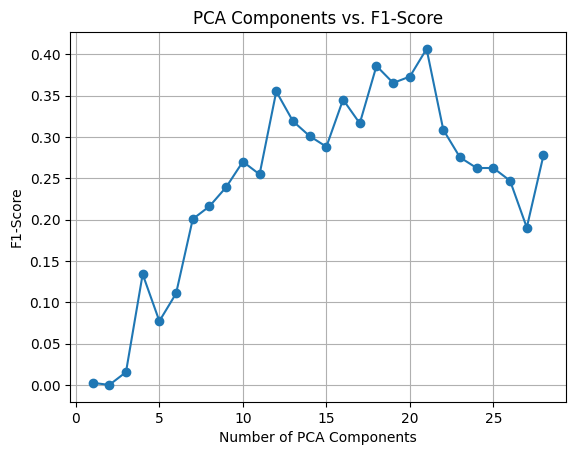

최적의 PCA 차원 수: 21


In [48]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('creditcard.csv')

# Class 제거 (타겟 변수)
X = df.drop(columns=['Class'])
y = df['Class']

# Time과 Amount 표준화
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# 결과 저장용 리스트
performance = []

# 차원 축소 범위 설정 (1 ~ 28개 차원)
for n in range(1, 29):
    # PCA 차원 축소
    pca = PCA(n_components=n)
    pca_features = pca.fit_transform(X.filter(like='V'))
    
    # PCA 축소된 특징 추가
    X_pca = X[['Time', 'Amount']].copy()
    for i in range(n):
        X_pca[f'PCA_{i+1}'] = pca_features[:, i]
    
    # Isolation Forest 모델 학습
    model = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
    y_pred = model.fit_predict(X_pca)

    # 예측 결과 변환 (1: 정상, -1: 이상치 → 0: 정상, 1: 이상치)
    y_pred = [0 if x == 1 else 1 for x in y_pred]
    
    # 평가 (Precision, Recall, F1-Score 등)
    report = classification_report(y, y_pred, output_dict=True)
    f1_score = report['1']['f1-score']  # 부정 거래(클래스 1)의 F1 스코어
    performance.append({'n_components': n, 'f1_score': f1_score})
    print(f"n_components={n}, F1-Score: {f1_score:.4f}")

# 성능 결과 데이터프레임
perf_df = pd.DataFrame(performance)

# 최적 차원 시각화
plt.plot(perf_df['n_components'], perf_df['f1_score'], marker='o')
plt.title("PCA Components vs. F1-Score")
plt.xlabel("Number of PCA Components")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

# 최적의 차원 출력
best_n = perf_df.loc[perf_df['f1_score'].idxmax(), 'n_components']
print(f"최적의 PCA 차원 수: {best_n}")


=== 모델 평가 ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.13      0.75      0.22       492

    accuracy                           0.99    284807
   macro avg       0.56      0.87      0.61    284807
weighted avg       1.00      0.99      0.99    284807



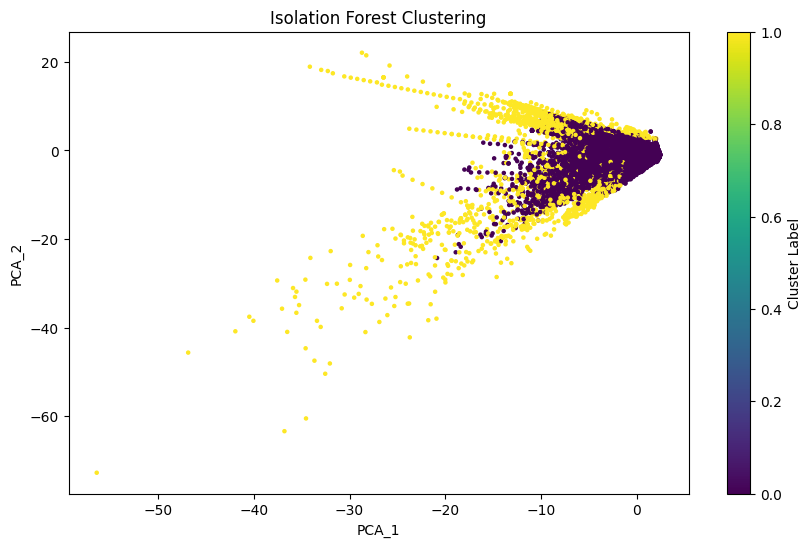

In [74]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('creditcard.csv')

# Class 제거 (타겟 변수)
X = df.drop(columns=['Class'])
y = df['Class']

# Time과 Amount 표준화
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# V1~V28 차원 축소 (PCA)
n_components = 21  # 차원 수 조정 가능
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(X.filter(like='V'))

# PCA 결과를 데이터프레임으로 변환하고 원본 데이터와 병합
pca_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(n_components)])
X = pd.concat([X[['Time', 'Amount']], pca_df], axis=1)

# Isolation Forest 모델 학습
contamination_rate = y.mean()  # 부정 거래 비율로 설정
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
y_pred = model.fit_predict(X)

# 예측 결과 변환 (1: 정상, -1: 이상치 → 0: 정상, 1: 이상치)
y_pred = [0 if x == 1 else 1 for x in y_pred]

# 평가
print("=== 모델 평가 ===")
print(classification_report(y, y_pred))

# 시각화 (PCA 주요 두 차원과 Amount의 관계)
plt.figure(figsize=(10, 6))
plt.scatter(X['PCA_1'], X['PCA_2'], c=y_pred, cmap='viridis', s=5)
plt.title('Isolation Forest Clustering')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.colorbar(label='Cluster Label')
plt.show()

#현재까지 나온 결론 차원축소를 해도 결과가 비슷한거 보니 28개의 'v'특성 중 이상치 탐색에 유의미한 영향을 줄 수 없는 특성이 있는 것 같다는
# 결론을 내림 축소하기 전 각 특성이 이상치 탐색에 얼마나 중요한 특성인지 판단해야할 것 같음 방법 모색하자

In [81]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

# 데이터 로드
df = pd.read_csv('creditcard.csv')

# Class 제거 (타겟 변수)
X = df.drop(columns=['Class'])
y = df['Class']

# Time과 Amount 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Isolation Forest 모델 학습
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X)

# 특성 중요도 계산
feature_importances = np.std(X.values, axis=0) * model.decision_function(X)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("=== 특성 중요도 ===")
print(importance_df)

# 상위 10개 특성 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


ValueError: operands could not be broadcast together with shapes (30,) (284807,) 